In [1]:
filename = 'movie_comments.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(filename)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
content.head(2)

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2


In [6]:
articles = content['comment'].tolist()

In [7]:
import re

In [8]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [9]:
from collections import Counter

In [10]:
import jieba

In [11]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [12]:
with open('article_9k.txt', 'w',encoding='utf-8') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [13]:
def cut(string): 
    return list(jieba.cut(string))

In [14]:
TOKEN = []

In [15]:
for i, line in enumerate((open('article_9k.txt',encoding='utf-8'))):
    if i % 10000 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Windows\Temp\jieba.cache


0


Loading model cost 1.559 seconds.
Prefix dict has been built succesfully.


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000


In [16]:
from collections import Counter

In [17]:
words_count = Counter(TOKEN)

In [18]:
words_count.most_common(100)

[('的', 328262),
 ('\n', 261497),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290),
 ('在', 31245),
 ('不', 28435),
 ('有', 27939),
 ('就', 25685),
 ('人', 23909),
 ('好', 22858),
 ('啊', 20803),
 ('这', 17484),
 ('还', 17449),
 ('一个', 17343),
 ('你', 17282),
 ('还是', 16425),
 ('但', 15578),
 ('故事', 15010),
 ('没有', 14343),
 ('就是', 14007),
 ('喜欢', 13566),
 ('让', 13304),
 ('太', 12676),
 ('又', 11566),
 ('剧情', 11359),
 ('没', 10858),
 ('说', 10764),
 ('吧', 10747),
 ('他', 10675),
 ('不错', 10416),
 ('得', 10349),
 ('到', 10341),
 ('给', 10300),
 ('这个', 10058),
 ('上', 10054),
 ('被', 9939),
 ('对', 9824),
 ('最后', 9694),
 ('一部', 9693),
 ('片子', 9590),
 ('什么', 9571),
 ('能', 9532),
 ('与', 9168),
 ('多', 8977),
 ('可以', 8972),
 ('不是', 8811),
 ('最', 8669),
 ('觉得', 8626),
 ('中', 8446),
 ('导演', 8390),
 ('自己', 8354),
 ('拍', 8172),
 ('好看', 8085),
 ('要', 8081),
 ('真的', 7908),
 ('感觉', 7828),
 ('但是', 7723),
 ('里', 7655),
 ('那', 7503),
 ('有点',

In [19]:
frequiences = [f for w, f in words_count.most_common(100)]

In [20]:
x = [i for i in range(100)]

In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt

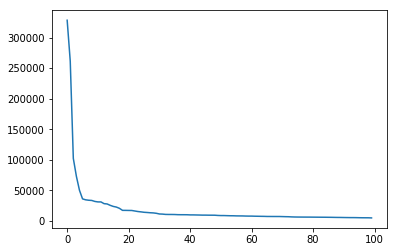

In [23]:
plt.plot(x, frequiences)

In [24]:
import numpy as np

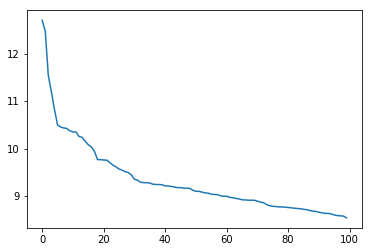

In [25]:
plt.plot(x, np.log(frequiences))

In [26]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [27]:
prob_1('我们')

0.0012363709828465365

In [28]:
TOKEN = [str(t) for t in TOKEN]

In [29]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [30]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [31]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [32]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word2]
    else:
        return 1 / len(TOKEN_2_GRAM)

In [33]:
prob_2('去', '吃饭')

0.012121212121212121

In [34]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    sentence_pro * prob_1(words[-1])
    
    return sentence_pro

In [35]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.972425321692709e-36

In [36]:
get_probablity('小明今天抽奖抽到一架波音飞机')

8.686537398906023e-41

In [37]:
get_probablity('洋葱奶昔来一杯')

6.066795712140993e-16

In [38]:
get_probablity('养乐多绿来一杯')

4.4287608698629254e-14

In [39]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.4308849504131287e-32
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.676472379595261e-33
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 5.67345289160971e-19
---- 真是一只好看的小猫 with probility 1.1800926938415836e-12
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 7.702751683939199e-08
---- 今晚火锅去吃我 with probility 6.927596017634061e-20
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 6.066795712140993e-16
---- 养乐多绿来一杯 with probility 4.4287608698629254e-14
